In [5]:
import pandas as pd
import numpy as np
import os

In [17]:
#try tp focus on the Treg CTLA4++ first
def select_pair_Treg(group, root_path):
    path = os.path.join(root_path,group, 'out/pvalues.txt')
    temp = pd.read_table(path)
    
    path_mean = os.path.join(root_path,group, 'out/significant_means.txt')
    temp_mean = pd.read_table(path_mean)
    
    celltype_pair = [x for x in temp.columns.to_list() if '|' in x]
    col = celltype_pair + ['interacting_pair']
    df = temp.loc[:,col].copy()
    df = df.set_index('interacting_pair')
    
#report total interactions in each group
    total_int = (df<0.05).values.sum()
    print("The group {} has total {} interactions".format(group, total_int))
    
    #let's only keep Tregs TCLA4++
    temp_list = df.columns.to_list()
    new_list = [x for x in temp_list if ((x.split('|')[0] == 'CD4+ Treg CTLA4++') |
               (x.split('|')[1] == 'CD4+ Treg CTLA4++'))]
    df = df.loc[:,new_list].copy()
    treg_int = (df<0.05).values.sum()
    print("The group {} has total {} Treg interactions".format(group, treg_int))
    #end
    
    df_2 = df.loc[(df < 0.05).any(axis=1),:].copy()
    
    rank = temp_mean.loc[:,['interacting_pair','rank']].copy()
    rank = rank.set_index('interacting_pair')
    df_2['rank'] = rank.loc[df_2.index, 'rank'].copy()
    df_2 = df_2.sort_values(by = 'rank')
    
#     df_3 = df_2.loc[df_2['rank'] < cutoff]
#     df_3 = df_3.loc[:,(df_3 < 0.05).any(axis=0)].copy()
       
#     df_ind = df_3.index.to_frame()
#     path_i = os.path.join(root_path,group,'df_ind.txt')
#     df_ind.to_csv(path_i, header=False, index=False)

#     df_col = df_3.iloc[:,:-1].columns.to_frame()    
#     path_c = os.path.join(root_path,group,'df_col.txt')
#     df_col.to_csv(path_c, header=False, index=False)
    
    return(df_2, new_list)

def select_pair_batch_Treg(group_list, root_path):
    dic = {}
    for group in group_list:
        dic[group], new_list = select_pair_Treg(group, root_path)
    return(dic, new_list)

#select pairs for every cell pairs
def select_pair_total(group, root_path):
    path = os.path.join(root_path,group, 'out/pvalues_new.txt')
    temp = pd.read_table(path)
    
    path_mean = os.path.join(root_path,group, 'out/significant_means_new.txt')
    temp_mean = pd.read_table(path_mean)
    
    celltype_pair = [x for x in temp.columns.to_list() if '|' in x]
    col = celltype_pair + ['interacting_pair']
    df = temp.loc[:,col].copy()
    df = df.set_index('interacting_pair')
    #cellpair list
    new_list = [x for x in df.columns if '|' in x]
    
#report total interactions in each group
    total_int = (df<0.05).values.sum()
    print("The group {} has total {} interactions".format(group, total_int))    
    df_2 = df.loc[(df < 0.05).any(axis=1),:].copy()
    
    rank = temp_mean.loc[:,['interacting_pair','rank']].copy()
    rank = rank.set_index('interacting_pair')
    df_2['rank'] = rank.loc[df_2.index, 'rank'].copy()
    df_2 = df_2.sort_values(by = 'rank')

    
    return(df_2, new_list)

def select_pair_batch_total(group_list, root_path):
    dic = {}
    for group in group_list:
        dic[group], new_list = select_pair_total(group, root_path)
    return(dic, new_list)

In [18]:
#all cell pairs
group_list = ['IT', 'IA', 'HC', 'CR', 'AR']
root_path = '/domino/edv/id-td-virology/Zhiyuan/public/Gut_remap/processed_data/cellphonedb'
# cutoff = 0.05

dic_total, new_list_total = select_pair_batch_total(group_list, root_path)

The group IT has total 2773 interactions
The group IA has total 2115 interactions
The group HC has total 1653 interactions
The group CR has total 2321 interactions
The group AR has total 2314 interactions


In [19]:
new_list_total

['CD4+ T Naive/Central memory|CD4+ T Naive/Central memory',
 'CD4+ T Naive/Central memory|CD4+ T Effector',
 'CD4+ T Naive/Central memory|CD4+ Resident Treg',
 'CD4+ T Naive/Central memory|CD4+ Circulating Treg',
 'CD4+ T Naive/Central memory|CD4+ T Effector Memory',
 'CD4+ T Naive/Central memory|CD8+ MAIT',
 'CD4+ T Naive/Central memory|CD8+ T Naïve',
 'CD4+ T Naive/Central memory|CD8+ T Central Memory',
 'CD4+ T Naive/Central memory|CD8+ T Effector Memory',
 'CD4+ T Naive/Central memory|CD8+ T Effector',
 'CD4+ T Naive/Central memory|CD8+ T Exhausted',
 'CD4+ T Naive/Central memory|DN-Tcell',
 'CD4+ T Naive/Central memory|gdT',
 'CD4+ T Effector|CD4+ T Naive/Central memory',
 'CD4+ T Effector|CD4+ T Effector',
 'CD4+ T Effector|CD4+ Resident Treg',
 'CD4+ T Effector|CD4+ Circulating Treg',
 'CD4+ T Effector|CD4+ T Effector Memory',
 'CD4+ T Effector|CD8+ MAIT',
 'CD4+ T Effector|CD8+ T Naïve',
 'CD4+ T Effector|CD8+ T Central Memory',
 'CD4+ T Effector|CD8+ T Effector Memory',
 'CD4+

In [6]:
#Treg relative pairs
group_list = ['IT', 'IA', 'HC', 'CR', 'AR']
root_path = '/domino/edv/id-td-virology/Zhiyuan/public/Gut_remap/processed_data/cellphonedb'
# cutoff = 0.05

dic, new_list = select_pair_batch_Treg(group_list, root_path)

The group IT has total 2773 interactions
The group IT has total 490 Treg interactions
The group IA has total 2115 interactions
The group IA has total 321 Treg interactions
The group HC has total 1653 interactions
The group HC has total 204 Treg interactions
The group CR has total 2321 interactions
The group CR has total 353 Treg interactions
The group AR has total 2314 interactions
The group AR has total 431 Treg interactions


In [4]:
dic['IT']

,CD4+ Naive/cm|CD4+ Treg CTLA4++,CD4+ Th1_like|CD4+ Treg CTLA4++,CD4+ Treg CTLA4++|CD4+ Naive/cm,CD4+ Treg CTLA4++|CD4+ Th1_like,CD4+ Treg CTLA4++|CD4+ Treg CTLA4++,CD4+ Treg CTLA4++|CD4+ Treg SELL++,CD4+ Treg CTLA4++|CD4+ intermediate,CD4+ Treg CTLA4++|CD8+ MAIT,CD4+ Treg CTLA4++|CD8+ Naive,CD4+ Treg CTLA4++|CD8+ Tcm,...,CD4+ intermediate|CD4+ Treg CTLA4++,CD8+ MAIT|CD4+ Treg CTLA4++,CD8+ Naive|CD4+ Treg CTLA4++,CD8+ Tcm|CD4+ Treg CTLA4++,CD8+ Tem|CD4+ Treg CTLA4++,CD8+ Temra/Teff|CD4+ Treg CTLA4++,CD8+ Tex|CD4+ Treg CTLA4++,DN-Tcell|CD4+ Treg CTLA4++,gdT|CD4+ Treg CTLA4++,rank
interacting_pair,,,,,,,,,,,,,,,,,,,,,
CADM1_CADM1,1.0,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,...,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.006
CCL4_CCR8,1.0,0.833,1.000,1.000,0.944,1.000,1.000,1.000,1.000,1.000,...,1.0,0.000,1.000,0.944,0.000,0.702,0.350,1.000,0.120,0.012
CD200_CD200R1,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.012
LGALS9_HAVCR2,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.024
LTA_RIPK1,1.0,1.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,...,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MIF_TNFRSF14,1.0,0.000,0.714,0.929,0.466,0.059,0.725,1.000,0.993,0.965,...,0.0,0.000,0.137,0.000,0.000,0.020,1.000,0.892,0.421,0.444
HLA-E_KLRK1,1.0,1.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,...,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.450
BSG_PPIA,1.0,1.000,1.000,0.000,0.988,0.000,0.280,0.079,0.675,0.028,...,1.0,0.988,1.000,1.000,0.992,0.965,0.945,0.992,0.988,0.467


In [8]:
dic_total['IT']

,CD4+ T Naive/Central memory|CD4+ T Naive/Central memory,CD4+ T Naive/Central memory|CD4+ T Effector,CD4+ T Naive/Central memory|CD4+ Resident Treg,CD4+ T Naive/Central memory|CD4+ Circulating Treg,CD4+ T Naive/Central memory|CD4+ T Effector Memory,CD4+ T Naive/Central memory|CD8+ MAIT,CD4+ T Naive/Central memory|CD8+ T Naïve,CD4+ T Naive/Central memory|CD8+ T Central Memory,CD4+ T Naive/Central memory|CD8+ T Effector Memory,CD4+ T Naive/Central memory|CD8+ T Effector,...,gdT|CD4+ T Effector Memory,gdT|CD8+ MAIT,gdT|CD8+ T Naïve,gdT|CD8+ T Central Memory,gdT|CD8+ T Effector Memory,gdT|CD8+ T Effector,gdT|CD8+ T Exhausted,gdT|DN-Tcell,gdT|gdT,rank
interacting_pair,,,,,,,,,,,,,,,,,,,,,
CADM1_CADM1,1.0,1.000,1.0,1.000,1.0,1.0,1.0,1.000,1.0,1.0,...,1.000,1.000,1.000,1.000,1.0,1.0,1.000,1.000,1.0,0.006
CD200_CD200R1,1.0,1.000,1.0,1.000,1.0,1.0,1.0,1.000,1.0,1.0,...,1.000,1.000,1.000,1.000,1.0,1.0,1.000,1.000,1.0,0.012
CCL4_CCR8,1.0,1.000,1.0,1.000,1.0,1.0,1.0,1.000,1.0,1.0,...,1.000,1.000,1.000,1.000,1.0,1.0,1.000,1.000,1.0,0.012
CCL4_SLC7A1,1.0,1.000,1.0,1.000,1.0,1.0,1.0,1.000,1.0,1.0,...,1.000,1.000,1.000,1.000,1.0,1.0,0.398,1.000,1.0,0.012
ProstaglandinD2_byAKR1C3_PTGDR,1.0,1.000,1.0,1.000,1.0,1.0,1.0,1.000,1.0,1.0,...,1.000,0.000,1.000,1.000,0.0,0.0,1.000,1.000,0.0,0.024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD74_COPA,1.0,1.000,1.0,1.000,1.0,1.0,1.0,1.000,1.0,1.0,...,0.000,0.000,1.000,0.000,0.0,0.0,0.000,0.000,0.0,0.444
HLA-E_KLRK1,1.0,1.000,1.0,1.000,1.0,1.0,1.0,1.000,1.0,1.0,...,1.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.450
BSG_PPIA,1.0,0.972,1.0,0.000,1.0,1.0,1.0,0.833,1.0,0.0,...,0.304,0.031,0.694,0.032,0.0,0.0,1.000,0.000,0.0,0.467


<AxesSubplot:title={'center':'IT'}, ylabel='Frequency'>

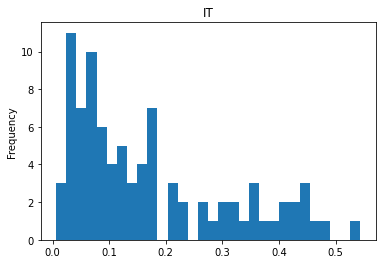

In [18]:
dic['IT']['rank'].plot(kind = 'hist', bins = 30, title = 'IT', xlabel = 'Rank')

<AxesSubplot:title={'center':'IT'}, ylabel='Frequency'>

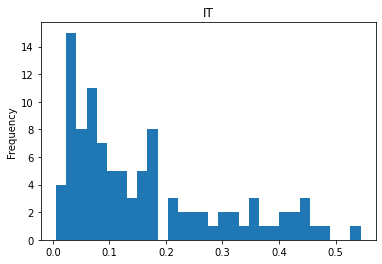

In [9]:
dic_total['IT']['rank'].plot(kind = 'hist', bins = 30, title = 'IT', xlabel = 'Rank')

In [21]:
len(dic['IT'])

88

<AxesSubplot:ylabel='Frequency'>

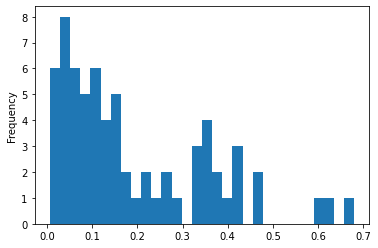

In [6]:
dic['CR'].loc[:,'rank'].plot(kind = 'hist', bins = 30)

In [11]:
#finding the top interacting celltypes in each group
def top_cellpair_group(dic):
    new_dic = {}
    top3 = {}
    group_list = list(dic.keys())
    for group in group_list:
        temp = dic[group].loc[dic[group]['rank'] <=0.2].copy() #only select high specific interactions
        cell_pair_list = dic[group].columns[:-1]
        
        n_list = []
        celltype_list = []
        gene_list = []
        for i, cell_pair in enumerate(cell_pair_list):
            n = (temp[cell_pair] < 0.05).sum()
            gene = temp.loc[temp[cell_pair] < 0.05].index.to_list()
            n_list.append(n)
            celltype_list.append(cell_pair)
            gene_list.append(gene)
            
        df_temp = pd.DataFrame({'cell_pair':celltype_list, 'n_pair':n_list, 'gene_pair':gene_list})
        df_temp = df_temp.sort_values(by = 'n_pair', ascending = False)
        new_dic[group] = df_temp
        top3[group] = df_temp.iloc[0:3,0].to_list()
        
    df_top3 = pd.DataFrame(top3, columns = group_list)
        
        
    return(new_dic, df_top3)

#for a specific cell_pair, grab all genes across all groups
def grab_gene(new_dic, cell_pair):
    group_list = list(new_dic.keys())
    temp_list = []
    for group in group_list:
        temp_df = new_dic[group].set_index('cell_pair')
        if not temp_list:
            temp_list = temp_df.loc[cell_pair, 'gene_pair']
        else:
            temp_list = temp_list + temp_df.loc[cell_pair, 'gene_pair']
            temp_list = list(set(temp_list))
            
    return(temp_list)
        
#for a gene pair list for every cell type
def grab_gene_batch(new_dic, cell_pair_list):
    df = pd.DataFrame(index = cell_pair_list, columns = ['gene_list'])
    for cell_pair in cell_pair_list:
        df.loc[cell_pair, 'gene_list'] = grab_gene(new_dic, cell_pair)

    return(df)
        
        
    
    
    
    

In [6]:
new_dic, df_top3 = top_cellpair_group(dic)

In [20]:
new_dic_total, df_top3_total = top_cellpair_group(dic_total)

In [21]:
new_dic_total['IT']

,cell_pair,n_pair,gene_pair
74,CD8+ MAIT|CD8+ T Effector,23,"[ICAM1_integrin_aMb2_complex, HLA-B_KIR3DL2, H..."
109,CD8+ T Effector Memory|CD8+ MAIT,22,"[CCL3L1_DPP4, Cholesterol_byDHCR7_RORC, TNFSF9..."
70,CD8+ MAIT|CD8+ MAIT,21,"[Cholesterol_byDHCR7_RORC, CCR6_CCL20, CCL4_CC..."
22,CD4+ T Effector|CD8+ T Effector,20,"[ICAM1_integrin_aMb2_complex, HLA-B_KIR3DL2, H..."
77,CD8+ MAIT|gdT,20,"[ICAM1_integrin_aMb2_complex, ICAM1_AREG, HLA-..."
...,...,...,...
87,CD8+ T Naïve|CD8+ T Effector,0,[]
90,CD8+ T Naïve|gdT,0,[]
91,CD8+ T Central Memory|CD4+ T Naive/Central memory,0,[]
97,CD8+ T Central Memory|CD8+ T Naïve,0,[]


In [7]:
new_dic['IT']

,cell_pair,n_pair,gene_pair
7,CD4+ Treg CTLA4++|CD8+ MAIT,19,"[LTA_RIPK1, Cholesterol_byDHCR7_RORC, LTA_TNFR..."
17,CD8+ MAIT|CD4+ Treg CTLA4++,18,"[CCL4_CCR8, CRTAM_CADM1, ADORA2A_ENTPD1, CCL4_..."
20,CD8+ Tem|CD4+ Treg CTLA4++,16,"[CCL4_CCR8, CRTAM_CADM1, ADORA2A_ENTPD1, TNFSF..."
11,CD4+ Treg CTLA4++|CD8+ Temra/Teff,16,"[HLA-B_KIR3DL2, HLA-F_KIR3DL2, HLA-C_KIR2DL3, ..."
3,CD4+ Treg CTLA4++|CD4+ Th1_like,13,"[LTA_RIPK1, CXCR6_CXCL16, LTA_TNFRSF1B, LTA_TN..."
4,CD4+ Treg CTLA4++|CD4+ Treg CTLA4++,13,"[CADM1_CADM1, LTA_RIPK1, ADORA2A_ENTPD1, LTA_T..."
12,CD4+ Treg CTLA4++|CD8+ Tex,12,"[CD200_CD200R1, LTA_RIPK1, LTA_TNFRSF1B, BTLA_..."
14,CD4+ Treg CTLA4++|gdT,12,"[LTA_TNFRSF1B, LTA_TNFRSF14, LTA_TNFRSF1A, HLA..."
10,CD4+ Treg CTLA4++|CD8+ Tem,11,"[CD200_CD200R1, LTA_TNFRSF1B, BTLA_TNFRSF14, P..."
1,CD4+ Th1_like|CD4+ Treg CTLA4++,10,"[PLAUR_integrin_a4b1_complex, ICAM1_AREG, TNF_..."


In [8]:
df_top3

,IT,IA,HC,CR,AR
0,CD4+ Treg CTLA4++|CD8+ MAIT,CD8+ MAIT|CD4+ Treg CTLA4++,CD8+ MAIT|CD4+ Treg CTLA4++,CD8+ MAIT|CD4+ Treg CTLA4++,CD4+ Treg CTLA4++|CD8+ Tex
1,CD8+ MAIT|CD4+ Treg CTLA4++,CD4+ Treg CTLA4++|CD8+ MAIT,CD4+ Th1_like|CD4+ Treg CTLA4++,CD4+ Treg CTLA4++|CD8+ MAIT,CD4+ Treg CTLA4++|CD8+ MAIT
2,CD8+ Tem|CD4+ Treg CTLA4++,CD4+ Treg CTLA4++|CD8+ Tex,CD8+ Tex|CD4+ Treg CTLA4++,CD4+ Treg CTLA4++|DN-Tcell,CD8+ Tex|CD4+ Treg CTLA4++


In [22]:
df_top3_total

,IT,IA,HC,CR,AR
0,CD8+ MAIT|CD8+ T Effector,CD8+ MAIT|CD8+ T Exhausted,CD8+ MAIT|CD8+ MAIT,CD8+ MAIT|DN-Tcell,CD8+ MAIT|CD8+ T Exhausted
1,CD8+ T Effector Memory|CD8+ MAIT,CD8+ MAIT|CD8+ MAIT,CD8+ MAIT|CD8+ T Effector,CD8+ MAIT|CD8+ MAIT,CD8+ MAIT|CD8+ MAIT
2,CD8+ MAIT|CD8+ MAIT,CD8+ T Effector Memory|CD8+ T Exhausted,CD8+ MAIT|CD8+ T Effector Memory,CD8+ MAIT|CD8+ T Exhausted,CD4+ Resident Treg|CD8+ T Exhausted


In [20]:
cell_pair_list = new_list #cell pair list that involve Tregs
df_Treg = grab_gene_batch(new_dic, cell_pair_list)

In [23]:
cell_pair_list_total = new_list_total #cell pair list include all
df_total = grab_gene_batch(new_dic_total, cell_pair_list_total)

In [24]:
df_total

,gene_list
CD4+ T Naive/Central memory|CD4+ T Naive/Central memory,[APP_SORL1]
CD4+ T Naive/Central memory|CD4+ T Effector,"[TNFSF12_TNFRSF25, APP_SORL1, TNFSF10_RIPK1, C..."
CD4+ T Naive/Central memory|CD4+ Resident Treg,"[NR3C1_IL10, TNFRSF1A_GRN, TNFSF10_RIPK1]"
CD4+ T Naive/Central memory|CD4+ Circulating Treg,[APP_SORL1]
CD4+ T Naive/Central memory|CD4+ T Effector Memory,[APP_SORL1]
...,...
gdT|CD8+ T Effector Memory,"[PTGER2_ProstaglandinE2_byPTGES3, CCL5_CCR5, P..."
gdT|CD8+ T Effector,"[LAMP1_FAM3C, TNFSF14_TNFRSF14, ProstaglandinD..."
gdT|CD8+ T Exhausted,"[LAMP1_FAM3C, CCL5_CCR5, CCL5_CCR4, TNFRSF1A_F..."
gdT|DN-Tcell,"[LAMP1_FAM3C, TNFSF14_TNFRSF14, NR3C1_IL10, TN..."


In [ ]:
#write df_total
savepath = '/domino/edv/id-td-virology/Zhiyuan/public/Gut_remap/processed_data/cellphonedb/Treg_gene_list.tsv'
df_Treg.to_csv(savepath, sep = '\t')

In [25]:
#write df
savepath = '/domino/edv/id-td-virology/Zhiyuan/public/Gut_remap/processed_data/cellphonedb/Total_gene_list.tsv'
df_total.to_csv(savepath, sep = '\t')

In [9]:
group_list = list(new_dic.keys())
for group in group_list:
    temp = new_dic[group].iloc[:,0:2].copy()
    temp.columns = ['cell_pair_{}'.format(group), 'n_gene_pair_{}'.format(group)]
    temp = temp.reset_index(drop = True)
    if group == group_list[0]:
        df_sort = temp
    else:
        df_sort.loc[:,temp.columns] = temp
    

In [10]:
df_sort

,cell_pair_IT,n_gene_pair_IT,cell_pair_IA,n_gene_pair_IA,cell_pair_HC,n_gene_pair_HC,cell_pair_CR,n_gene_pair_CR,cell_pair_AR,n_gene_pair_AR
0,CD4+ Treg CTLA4++|CD8+ MAIT,19,CD8+ MAIT|CD4+ Treg CTLA4++,12,CD8+ MAIT|CD4+ Treg CTLA4++,13,CD8+ MAIT|CD4+ Treg CTLA4++,15,CD4+ Treg CTLA4++|CD8+ Tex,19
1,CD8+ MAIT|CD4+ Treg CTLA4++,18,CD4+ Treg CTLA4++|CD8+ MAIT,10,CD4+ Th1_like|CD4+ Treg CTLA4++,9,CD4+ Treg CTLA4++|CD8+ MAIT,10,CD4+ Treg CTLA4++|CD8+ MAIT,16
2,CD8+ Tem|CD4+ Treg CTLA4++,16,CD4+ Treg CTLA4++|CD8+ Tex,9,CD8+ Tex|CD4+ Treg CTLA4++,9,CD4+ Treg CTLA4++|DN-Tcell,8,CD8+ Tex|CD4+ Treg CTLA4++,15
3,CD4+ Treg CTLA4++|CD8+ Temra/Teff,16,CD8+ Tex|CD4+ Treg CTLA4++,8,gdT|CD4+ Treg CTLA4++,7,CD4+ Th1_like|CD4+ Treg CTLA4++,7,CD8+ MAIT|CD4+ Treg CTLA4++,15
4,CD4+ Treg CTLA4++|CD4+ Th1_like,13,CD8+ Tem|CD4+ Treg CTLA4++,7,CD8+ Tem|CD4+ Treg CTLA4++,7,DN-Tcell|CD4+ Treg CTLA4++,7,CD4+ Treg CTLA4++|CD4+ Treg CTLA4++,13
5,CD4+ Treg CTLA4++|CD4+ Treg CTLA4++,13,DN-Tcell|CD4+ Treg CTLA4++,6,CD4+ Treg CTLA4++|CD8+ MAIT,7,CD4+ Treg CTLA4++|CD4+ Th1_like,7,CD8+ Tem|CD4+ Treg CTLA4++,13
6,CD4+ Treg CTLA4++|CD8+ Tex,12,CD4+ Treg CTLA4++|CD8+ Temra/Teff,6,CD4+ Treg SELL++|CD4+ Treg CTLA4++,6,CD8+ Temra/Teff|CD4+ Treg CTLA4++,7,CD4+ Treg CTLA4++|CD8+ Tem,10
7,CD4+ Treg CTLA4++|gdT,12,CD4+ Th1_like|CD4+ Treg CTLA4++,5,DN-Tcell|CD4+ Treg CTLA4++,5,CD4+ Treg CTLA4++|CD8+ Tex,6,CD4+ Treg CTLA4++|CD8+ Temra/Teff,10
8,CD4+ Treg CTLA4++|CD8+ Tem,11,CD4+ Treg CTLA4++|DN-Tcell,5,CD8+ Temra/Teff|CD4+ Treg CTLA4++,5,CD4+ Treg CTLA4++|CD8+ Tem,6,DN-Tcell|CD4+ Treg CTLA4++,9
9,CD4+ Th1_like|CD4+ Treg CTLA4++,10,CD4+ Treg CTLA4++|CD4+ Th1_like,4,CD4+ Treg CTLA4++|DN-Tcell,4,CD8+ Tem|CD4+ Treg CTLA4++,5,CD4+ Th1_like|CD4+ Treg CTLA4++,9


In [113]:
cell_pair = 'CD8+ MAIT|CD4+ Treg CTLA4++'
gene_list = grab_gene(new_dic, cell_pair)
gene_list

['TNF_RIPK1',
 'TNF_VSIR',
 'TNFRSF1A_GRN',
 'PTGER2_ProstaglandinE2_byPTGES3',
 'ICAM1_AREG',
 'CCL5_CCR5',
 'ADORA2A_ENTPD1',
 'FAM3C_CLEC2D',
 'CCL4_CCR8',
 'Desmosterol_byDHCR7_NR1H2',
 'PTGER2_ProstaglandinE2_byPTGES2',
 'TYROBP_CD44',
 'CRTAM_CADM1',
 'ICAM1_ITGAL',
 'CD160_TNFRSF14',
 'CCL5_CCR4',
 'ICAM1_integrin_aLb2_complex',
 'TNF_ICOS',
 'ICAM1_SPN',
 'CCL4L2_VSIR',
 'TNFRSF1B_GRN',
 'NR3C1_IL10',
 'TNF_TNFRSF1A',
 'NCR3_BAG6',
 'TNF_FAS',
 'TNFSF14_TNFRSF14',
 'TNF_TNFRSF1B',
 'ADORA2A_NAMPT',
 'CCL4_CCR5',
 'PTGER4_ProstaglandinE2_byPTGES2']

In [112]:
cell_pair = 'CD4+ Treg CTLA4++|CD8+ MAIT'
gene_list = grab_gene(new_dic, cell_pair)
gene_list

['TNFRSF1A_FASLG',
 'LGALS9_P4HB',
 'LTA_RIPK1',
 'BTLA_TNFRSF14',
 'CLEC2B_KLRF1',
 'HLA-C_FAM3C',
 'CCR6_CCL20',
 'Cholesterol_byDHCR7_RORC',
 'Desmosterol_byDHCR7_NR1H2',
 'LAMP1_FAM3C',
 'Cholesterol_byLIPA_RORC',
 'LGALS9_SLC1A5',
 'LGALS9_SORL1',
 'PDCD1_FAM3C',
 'CXCR3_CCL20',
 'CCL4L2_VSIR',
 'Cholesterol_byLIPA_RORA',
 'FAS_FASLG',
 'LGALS9_CD44',
 'NR3C1_FASLG',
 'Cholesterol_byDHCR7_RORA',
 'TNFSF12_TNFRSF25',
 'TNF_TNFRSF1B',
 'ADORA2A_NAMPT',
 'LTA_TNFRSF1B',
 'TNFSF10_RIPK1',
 'LTA_TNFRSF1A',
 'PGRMC2_CCL4L2']

In [114]:
cell_pair = 'CD4+ Treg CTLA4++|CD8+ Tex'
gene_list = grab_gene(new_dic, cell_pair)
gene_list

['TNFRSF1A_FASLG',
 'LGALS9_P4HB',
 'CD200_CD200R1',
 'LTA_RIPK1',
 'BTLA_TNFRSF14',
 'HLA-C_FAM3C',
 'ADORA2A_ENTPD1',
 'Desmosterol_byDHCR7_NR1H2',
 'LAMP1_FAM3C',
 'TNFSF9_TNFRSF9',
 'LGALS9_CD47',
 'LGALS9_SLC1A5',
 'PDCD1_FAM3C',
 'TNF_ICOS',
 'HLA-DPA1_TNFSF9',
 'Cholesterol_byLIPA_RORA',
 'CCL4L2_VSIR',
 'FAS_FASLG',
 'LGALS9_CD44',
 'NR3C1_FASLG',
 'Cholesterol_byDHCR7_RORA',
 'LGALS9_HAVCR2',
 'CD27_CD70',
 'TNF_TNFRSF1B',
 'ADORA2A_NAMPT',
 'LTA_TNFRSF1B',
 'TNFSF10_RIPK1',
 'CCL4_CCR5']

In [10]:
cell_pair = 'CD8+ Tex|CD4+ Treg CTLA4++'
gene_list = grab_gene(new_dic, cell_pair)
gene_list

['CCL5_CCR5',
 'ADORA2A_ENTPD1',
 'CCL4_CCR5',
 'NR3C1_IL10',
 'PECAM1_CD38',
 'VCAM1_integrin_a4b1_complex',
 'Cholesterol_byDHCR7_RORA',
 'TNFRSF1B_GRN',
 'VCAM1_integrin_a4b7_complex',
 'ICAM1_integrin_aLb2_complex',
 'CCL5_CCR4',
 'ICAM1_ITGAL',
 'ADORA2A_NAMPT',
 'CCL3_CCR5',
 'PTGER4_ProstaglandinE2_byPTGES2',
 'HLA-DPA1_TNFSF9',
 'CRTAM_CADM1',
 'Desmosterol_byDHCR7_NR1H2',
 'PGRMC2_CCL4L2',
 'FAM3C_CLEC2D',
 'TNFSF9_TNFRSF9']

In [58]:
def group_pair(dic, index_list):
    group_list = list(dic.keys())
    df = pd.DataFrame(0,index = index_list, columns = group_list)

    for group in group_list:
        temp = (dic[group] < 0.05).sum(axis = 0).iloc[:-1]

        df.loc[temp.index, group] = temp.loc[:,]
    return(df)
        

In [59]:
df = group_pair(dic, new_list)

In [61]:
new_list

['CD4+ Naive/cm|CD4+ Treg CTLA4++',
 'CD4+ Th1_like|CD4+ Treg CTLA4++',
 'CD4+ Treg CTLA4++|CD4+ Naive/cm',
 'CD4+ Treg CTLA4++|CD4+ Th1_like',
 'CD4+ Treg CTLA4++|CD4+ Treg CTLA4++',
 'CD4+ Treg CTLA4++|CD4+ Treg SELL++',
 'CD4+ Treg CTLA4++|CD4+ intermediate',
 'CD4+ Treg CTLA4++|CD8+ MAIT',
 'CD4+ Treg CTLA4++|CD8+ Naive',
 'CD4+ Treg CTLA4++|CD8+ Tcm',
 'CD4+ Treg CTLA4++|CD8+ Tem',
 'CD4+ Treg CTLA4++|CD8+ Temra/Teff',
 'CD4+ Treg CTLA4++|CD8+ Tex',
 'CD4+ Treg CTLA4++|DN-Tcell',
 'CD4+ Treg CTLA4++|gdT',
 'CD4+ Treg SELL++|CD4+ Treg CTLA4++',
 'CD4+ intermediate|CD4+ Treg CTLA4++',
 'CD8+ MAIT|CD4+ Treg CTLA4++',
 'CD8+ Naive|CD4+ Treg CTLA4++',
 'CD8+ Tcm|CD4+ Treg CTLA4++',
 'CD8+ Tem|CD4+ Treg CTLA4++',
 'CD8+ Temra/Teff|CD4+ Treg CTLA4++',
 'CD8+ Tex|CD4+ Treg CTLA4++',
 'DN-Tcell|CD4+ Treg CTLA4++',
 'gdT|CD4+ Treg CTLA4++']

In [74]:
a = dic['IT'].sort_values(by = 'rank').index
b = dic['HC'].sort_values(by = 'rank').index

In [75]:
[x for x in a if x not in b]

['CADM1_CADM1',
 'CD200_CD200R1',
 'LTA_RIPK1',
 'CXCR6_CXCL16',
 'CRTAM_CADM1',
 'TNFRSF10A_TNFSF10',
 'Cholesterol_byDHCR7_RORC',
 'ADORA2A_ENTPD1',
 'HLA-B_KIR3DL2',
 'HLA-F_KIR3DL2',
 'HLA-C_KIR2DL3',
 'HLA-F_LILRB1',
 'LTA_TNFRSF1B',
 'LTA_TNFRSF14',
 'LTA_TNFRSF1A',
 'CCL4_CCR5',
 'ICAM1_AREG',
 'TNF_RIPK1',
 'CD74_APP',
 'TNFRSF1A_GRN',
 'BTLA_TNFRSF14',
 'PGRMC2_CCL4L2',
 'CCL3_CCR5',
 'TNFRSF1B_GRN',
 'CD94:NKG2E_HLA-E',
 'HLA-DPA1_TNFSF9',
 'ICAM1_SPN',
 'CD94:NKG2C_HLA-E',
 'HLA-E_KLRC2',
 'LGALS9_SLC1A5',
 'TNFSF10_RIPK1',
 'LAMP1_FAM3C',
 'NCR3_BAG6',
 'HLA-C_FAM3C',
 'LGALS9_P4HB',
 'CCL5_CCR5',
 'LGALS9_SORL1',
 'TGFB1_TGFBR3']

In [84]:
ind = [ 'HLA-B_KIR3DL2',
 'HLA-F_KIR3DL2',
 'HLA-C_KIR2DL3',
 'HLA-F_LILRB1',
 'TGFB1_TGFBR3',
 'CCL4_CCR5',
 'CCL3_CCR5'
      ]
test = dic['IT'].loc[ind,:]
test = test.loc[:,(test < 0.05).any(axis=0)].copy()

In [85]:
test

,CD4+ Treg CTLA4++|CD8+ Temra/Teff,CD4+ Treg CTLA4++|CD8+ Tex,CD8+ MAIT|CD4+ Treg CTLA4++,CD8+ Tem|CD4+ Treg CTLA4++,CD8+ Temra/Teff|CD4+ Treg CTLA4++,CD8+ Tex|CD4+ Treg CTLA4++,rank
interacting_pair,,,,,,,
HLA-B_KIR3DL2,0.00,1.000,1.0,1.0,1.0,1.000,0.041
HLA-F_KIR3DL2,0.00,1.000,1.0,1.0,1.0,1.000,0.041
HLA-C_KIR2DL3,0.00,1.000,1.0,1.0,1.0,1.000,0.041
HLA-F_LILRB1,0.00,1.000,1.0,1.0,1.0,1.000,0.041
TGFB1_TGFBR3,0.19,0.004,1.0,1.0,1.0,1.000,0.296
CCL4_CCR5,1.00,1.000,0.0,0.0,1.0,0.518,0.059
CCL3_CCR5,1.00,1.000,1.0,0.0,0.0,0.024,0.083


In [86]:
test_ind = test.index.to_frame()
path_i = '/domino/edv/id-td-virology/Zhiyuan/public/Gut_remap/processed_data/cellphonedb/test_ind.txt'
test_ind.to_csv(path_i, header=False, index=False)

test_col = test.iloc[:,:-1].columns.to_frame()    
path_c = '/domino/edv/id-td-virology/Zhiyuan/public/Gut_remap/processed_data/cellphonedb/test_col.txt'
test_col.to_csv(path_c, header=False, index=False)
    

In [ ]:
test_2 = dic['HC'].loc[ind,:]
test_2 = test_2.loc[:,(test_2 < 0.05).any(axis=0)].copy()

In [9]:
169*0.012

2.028